<span style="float:left;">Licence CC BY-SA</span><span style="float:right;">Fabrice Zaoui - Cedric Goeury&nbsp;</span><br/>
___

# Sediment discharge computation on yen_multi example of GAIA

This tutorial is intended for people who want an example showing how to compute the sediment discharge along a line.

In [1]:
from os import chdir, environ, path
from data_manip.extraction.telemac_file import TelemacFile
import numpy as np
from utils.geometry import get_norm2
from utils.exceptions import TelemacException
from data_manip.computation.polyline_integrals import flux_2d

The module 'polyline_integrals' is located in the '$HOMETEL/scripts/python3/data_manip/computation' directory. If an error occurs while attempting to import, check the value of the environment variable PYTHONPATH.


In [2]:
file_name = path.join(environ['HOMETEL'], 
                          'notebooks', 
                          'data',
                          'gaia_yen-exp_multi1.slf')

res = TelemacFile(file_name)

# Getting array of time values from file 
times = res.times

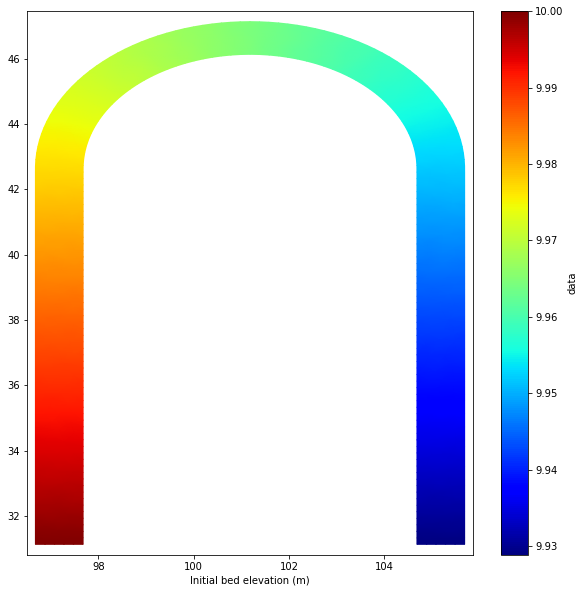

In [3]:
import matplotlib.pyplot as plt
from postel.plot2d import plot2d_scalar_map

# Initialising matplotlib figure
fig1, ax1 = plt.subplots(figsize=(10, 10))

data = res.get_data_value('BOTTOM', 0)

# Plotting scalar map
plot2d_scalar_map(fig1, ax1, res.tri, data, 'Initial bed elevation (m)')
    
# Showing the plot
plt.show()

Then, define a line as an array of np.array elements (required for the interpolation, check the Doxygen documentation of the script data_manip.extraction.telemac_file.py for more details). 

Define also the number of segments to be used for the discretisation of the line.

In [4]:
line = [np.array([101.25, 46.1355]),np.array([101.25, 47.135])]
line_num = [100]

Get the x and y solid discharges over time for each discretized points of the line.

In [5]:
line_discrete, line_abs_curv, qsb_x = res.get_timeseries_on_polyline('SOLID DISCH X',line,line_num)
line_discrete, line_abs_curv, qsb_y = res.get_timeseries_on_polyline('SOLID DISCH Y',line,line_num)

Now compute the integration of the solid discharge along the line:

In [6]:
discharge = flux_2d(line_discrete, qsb_x, qsb_y)

To visualise the results, let us plot the evolution of the solid discharge integrated on the line.

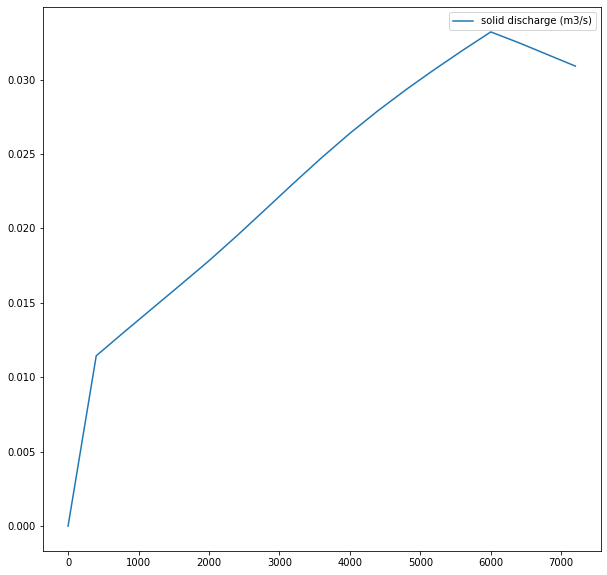

In [7]:
import matplotlib.pyplot as plt
from postel.plot1d import plot1d

#Initialising figure
fig, ax = plt.subplots(figsize=(10,10))

plot1d(ax, times, discharge, 'solid discharge (m3/s)')

# Displaying legend
ax.legend()

#Showing figure
plt.show()

del plt